### 构建变量及宽表

### 预备流程

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### 检查试乘试驾表变量维度及宽表

In [3]:
# 读取试乘试驾合并表: test_drive_ttl.csv
td_ttl = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/test_drive_ttl.csv', index_col=0,low_memory = False, encoding = "utf_8_sig")

In [3]:
# 检查表中vucsmobile 及 vcusid 无重复值数 分别为 117540, 119714
td_ttl[['vcusmobile','vcusid']].nunique()

vcusmobile    117540
vcusid        119714
dtype: int64

In [4]:
# 检查表头字段名称
td_ttl.columns

Index(['concat_id', 'jdealer', 'nbid', 'vid', 'vcusmobile', 'vcusid',
       'vprojectid', 'vdrivecarid', 'vrelatephone', 'vtrycarpath', 'vmemo',
       'bappoint', 'dtrybegin', 'dtryend', 'fbeginmile', 'fendmile', 'bisapp',
       'vowner', 'drivetype', 'pk', 'vseries', 'vmodel', 'intentvmodel',
       'intentvseries', 'voriginvw', 'vorigin', 'kf_testdrivetime',
       'kf_testdrivedistance', 'kf_testdrivecuscount', 'kf_testdrivecount',
       'visit_day', 'cleaned_distance', 'cleaned_time'],
      dtype='object')

td_ttl.to_csv('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/test_drive_ttl.csv', encoding='utf_8_sig', index=True)

In [4]:
# 检查表行数列数
td_ttl.shape

(132010, 33)

In [5]:
# 检查表各字段非重复值量级
td_ttl.nunique()

concat_id                89925
jdealer                    234
nbid                       234
vid                     132010
vcusmobile              117540
vcusid                  119714
vprojectid              119714
vdrivecarid                767
vrelatephone            115844
vtrycarpath                  3
vmemo                     2515
bappoint                     1
dtrybegin                95398
dtryend                  94603
fbeginmile                9391
fendmile                  9403
bisapp                       2
vowner                    2098
drivetype                    2
pk                       43629
vseries                      3
vmodel                       7
intentvmodel                24
intentvseries                5
voriginvw                    7
vorigin                     52
kf_testdrivetime          3164
kf_testdrivedistance       163
kf_testdrivecuscount         2
kf_testdrivecount            1
visit_day                  316
cleaned_distance            51
cleaned_

In [51]:
# 检查表各字段空值数
td_ttl.isna().sum()

concat_id                    0
jdealer                      0
nbid                         0
vid                          0
vcusmobile                   7
vcusid                       0
vprojectid                   0
vdrivecarid                  0
vrelatephone                 7
vtrycarpath                  0
vmemo                   127331
bappoint                104346
dtrybegin                   30
dtryend                   1034
fbeginmile                  30
fendmile                  1303
bisapp                       6
vowner                      10
drivetype                    0
pk                           0
vseries                      6
vmodel                       6
intentvmodel             37078
intentvseries                6
voriginvw                    0
vorigin                      0
kf_testdrivetime             0
kf_testdrivedistance         0
kf_testdrivecuscount         0
kf_testdrivecount            0
visit_day                   30
dtype: int64

### 构建试乘试驾表变量

#### 清理字段'kf_testdrivedistance', 及 'kf_testdrivetime'


In [154]:
# 新建dtaframe distance, 选取试乘试驾表里程频次出现最高的前35里程数
distance = td_ttl['kf_testdrivedistance'].value_counts().to_frame().iloc[:35,].reset_index().sort_values(by=['index'],ascending = True)
distance.columns = ['testdrive_distance','counts']
distance

# 前35里程数已覆盖近99%的数据，且已基本不包括异常值 131790
# td_ttl['kf_testdrivedistance'].value_counts().to_frame().iloc[:35,].reset_index()['kf_testdrivedistance'].sum()

,index,kf_testdrivedistance
13,0.0,1567
11,1.0,2916
5,2.0,6772
3,3.0,7800
7,4.0,5169
1,5.0,27741
4,6.0,7685
6,7.0,6367
2,8.0,11368
10,9.0,3949


In [157]:
# 计算平均每人试乘试驾里程数 答案为7.7公里/每人 
distance['multiple'] = distance['testdrive_distance'] * distance['counts']
avg_distance = round(distance['multiple'].sum() / distance['testdrive_distance'].sum(),1)
avg_distance

7.7

In [ ]:
# 新建drivetime dataframe, 选取试乘试驾表里程频次出现最高的前35试乘试驾时长
drivetime = td_ttl['kf_testdrivetime'].value_counts().to_frame().iloc[:800,].reset_index().sort_values(by=['index'],ascending = True)
distance.columns = ['testdrive_time','counts']
drivetime

# 前35里程数已覆盖近91%的数据，且已基本不包括异常值 119781
td_ttl['kf_testdrivetime'].value_counts().to_frame().iloc[:800,].reset_index()['kf_testdrivetime'].sum()

In [ ]:
# 计算平均每人试乘试驾时长 答案为14.53分钟/每人
drivetime['multiple'] = drivetime['testdrive_time'] * drivetime['counts']
avg_time = round(drivetime['multiple'].sum() / drivetime['testdrive_time'].sum(), 2)
avg_time

#### 制造出模型变量 'cleaned_distance', 'cleaned_time'

In [ ]:
# 分别将模型种的试乘试驾里程数/时长的异常值 用刚刚计算的平均值取代
td_ttl['cleaned_time'] = [avg_time if row < 0 or row > 60 else row for row in td_ttl.loc[:,'kf_testdrivetime']]

td_ttl['cleaned_distance'] = [avg_distance if row < 0 or row > 50 else row for row in td_ttl.loc[:,'kf_testdrivedistance']]

In [166]:
# 此处我们可发现之前的异常值 如- 26555861.77 已经被正常的平均值取代
td_ttl[['kf_testdrivetime','cleaned_time']].sort_values(by=['kf_testdrivetime'])

,kf_testdrivetime,cleaned_time
52070,-26555861.77,14.53
118940,-26555861.08,14.53
84652,0.00,0.00
102670,0.00,0.00
116697,0.00,0.00
...,...,...
44147,13020.00,14.53
64346,18747.00,14.53
82763,38984.00,14.53
45841,43206.00,14.53


#### 清理并制造模型新变量

In [261]:
# 删除无效字段并生成新dataframe td_ttl_1
td_ttl_1 = td_ttl.drop(['concat_id','vmemo','bappoint','pk','vorigin','kf_testdrivetime','kf_testdrivedistance','kf_testdrivecuscount','kf_testdrivecount'], axis=1)

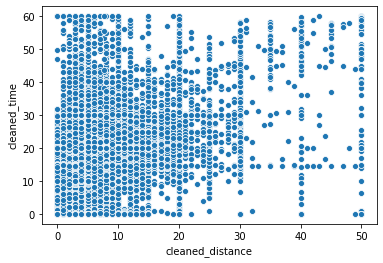

In [197]:
# 检查新模型变量的相关性
sns.scatterplot(td_ttl['cleaned_distance'],td_ttl['cleaned_time'])

In [4]:
# 同上
np.corrcoef(td_ttl['cleaned_distance'],td_ttl['cleaned_time'])

array([[1.        , 0.38776998],
       [0.38776998, 1.        ]])

In [263]:
td_ttl_1.head(5)

,jdealer,nbid,vid,vcusmobile,vcusid,vprojectid,vdrivecarid,vrelatephone,vtrycarpath,dtrybegin,dtryend,fbeginmile,fendmile,bisapp,vowner,drivetype,vseries,vmodel,intentvmodel,intentvseries,voriginvw,visit_day,cleaned_distance,cleaned_time
0,SJ32001,75E32001-0000-0000-0000-000000000000,003b1cf5-25e5-4dd5-be12-0b25f3d45839,21044a16ad398ce3f5cfce0db3993aa6,9a1f0ac2-4216-4ba7-a650-b487d5243e57,2094e7b1-c066-45ca-9010-ad3d271e5358,9e1197c1-6304-4a8e-8805-aca136f23b8e,21044a16ad398ce3f5cfce0db3993aa6,TryDriveRoute1,2019-11-14 12:35:05,2019-11-14 12:48:23,82.0,87.0,False,丁维致,1.0,0L,0L13PY,0L14PY,0L,4,2019-11-14,5.0,13.30
1,SJ41007,75E41007-0000-0000-0000-000000000000,01fb91f6-c249-4726-a144-eee2a99e7812,52002c0ced414e4328c48698f3c097a1,796be172-cba6-4fe1-ae1b-e0464b58ee3e,f0b43c15-3ff2-41fd-b709-29f7975d5362,2f5283e3-3e0e-41a3-ae18-f915f2b8c696,52002c0ced414e4328c48698f3c097a1,TryDriveRoute1,2019-11-23 14:45:56,2019-11-23 14:46:01,1002.0,1009.0,False,王院龙,1.0,0L,0L13PY,NaN,0L,6,2019-11-23,7.0,0.08
2,SJ22004,75E22004-0000-0000-0000-000000000000,0319140f-9bd8-45e8-a537-3a0638318dd4,8c899b9a328c8e4948a1fc95913a3b8c,05688702-d28f-4b6c-824c-f3f969e2f23b,5b0799ea-fece-460e-a434-a1e10963868c,9a853dbc-3a35-4980-b941-220f819151e3,8c899b9a328c8e4948a1fc95913a3b8c,TryDriveRoute1,2019-11-25 10:32:30,2019-11-25 10:42:00,245.0,250.0,False,王宇航,1.0,0L,0L13PY,0L12PY,0L,6,2019-11-25,5.0,9.50
3,SJ14006,75882920-0000-0000-0000-000000000000,049643a6-f51e-4bcb-ad08-ab3e7515d73d,19d7f4565d99dfeed4343be214efcaf5,abdbdce3-c542-4c6d-97e8-e5c3958a7fcd,5a253bf3-61d1-495a-9604-27f054b6e9c2,dcf2ba7a-5e11-4090-b6e1-beb1181d0c78,19d7f4565d99dfeed4343be214efcaf5,TryDriveRoute1,2019-12-27 14:20:32,2019-12-27 14:47:51,220.0,229.0,False,杨建强,2.0,0L,0L13PY,0L12PY,0L,6,2019-12-27,9.0,27.32
4,SJ23004,75E23004-0000-0000-0000-000000000000,049fad86-d75f-4463-997b-82f6e9f78815,58b6a5541fb332ee70f56cb454115e3d,5691cab3-34c0-48a4-b9bf-e72d28e16e85,81f71b7a-a820-4204-a768-e84d7bd0ae86,917756ba-7665-4806-b459-1034e295b3a7,58b6a5541fb332ee70f56cb454115e3d,TryDriveRoute1,2019-10-02 09:34:00,2019-10-02 10:04:00,5642.0,5650.0,False,王蕊,1.0,0L,0L14PY,0L12PY,0L,6,2019-10-02,8.0,30.00


In [28]:
cf_ttl.columns

Index(['concat_id', 'uid', 'jdealer', 'nbid', 'vcusmobile', 'vsex',
       'arrivetype', 'vbrand', 'vmodel', 'vpeernum', 'nattentionlong',
       'dbegin', 'dend', 'vmemo', 'vsaleman', 'voldowner', 'bproject',
       'vprojectid', 'bhaveproject', 'vfrom', 'bisdistribute', 'dfirstdis',
       'ddistribute', 'vdistributeman', 'bisconfirm', 'binformation',
       'isvalid', 'vinvalidrsn', 'vinvalidrsntext', 'clueid',
       'isfirstcomestore', 'appearancecolor', 'interiorcolor', 'voriginvw',
       'vorigin', 'vnumshop', 'createby', 'createon', 'updateby', 'updateon',
       'record_version', 'pk', 'vxfgatherid', 'kf_visitcount',
       'kf_zrfirstvisitcount', 'kf_yyfirstvisitcount', 'kf_ldfirstvisitcount',
       'kf_firstvisithour', 'kf_nofirstvisitcount', 'kf_nofirstvisitday',
       'kf_24potentialcount', 'ods_update_time', 'is_deleted', 'day_no'],
      dtype='object')

In [226]:
a.nunique()

jdealer               1
nbid                  1
vid                 116
vcusmobile            1
vcusid                1
vprojectid            1
vdrivecarid           3
vrelatephone          1
vtrycarpath           2
dtrybegin            40
dtryend              51
fbeginmile          108
fendmile            108
bisapp                1
vowner                1
drivetype             2
vseries               2
vmodel                3
intentvmodel          1
intentvseries         1
voriginvw             1
visit_day             3
cleaned_distance      2
cleaned_time          9
dtype: int64

#### 生成符合构建模型的试乘试驾宽表

In [24]:
# 提取手机号并去重去空值
driver_mobile = td_ttl[['vcusmobile']]

driver_mobile.shape

(132010, 1)

In [27]:
driver_mobile = driver_mobile.dropna()

driver_mobile = driver_mobile.drop_duplicates(keep='first')

# 去重去空的结果
driver_mobile.shape

(117540, 1)

In [37]:
# 制造仅含试驾数据的dataframe a(drivetype = 1）, 及仅含试乘试驾数据的dataframe b(drivetype = 2)
a = td_ttl[td_ttl['drivetype'] == 1.].reset_index(drop=True)

b = td_ttl[td_ttl['drivetype'] == 2.].reset_index(drop=True)

In [40]:
a.columns

Index(['concat_id', 'jdealer', 'nbid', 'vid', 'vcusmobile', 'vcusid',
       'vprojectid', 'vdrivecarid', 'vrelatephone', 'vtrycarpath', 'vmemo',
       'bappoint', 'dtrybegin', 'dtryend', 'fbeginmile', 'fendmile', 'bisapp',
       'vowner', 'drivetype', 'pk', 'vseries', 'vmodel', 'intentvmodel',
       'intentvseries', 'voriginvw', 'vorigin', 'kf_testdrivetime',
       'kf_testdrivedistance', 'kf_testdrivecuscount', 'kf_testdrivecount',
       'visit_day', 'cleaned_distance', 'cleaned_time'],
      dtype='object')

In [127]:
# 合并dataframe a 第一步
a_agg = a.groupby(['vcusmobile','drivetype','visit_day']).agg(
    {
        'vprojectid': "count",
        'cleaned_distance': 'sum',
        'cleaned_time': 'sum',
        'vtrycarpath': lambda x:x.value_counts().index[0]
    }
).reset_index()

agg_a = a_agg.copy()
agg_a

,vcusmobile,drivetype,visit_day,vprojectid,cleaned_distance,cleaned_time,vtrycarpath
0,000070ec48c0fc50489cb68817fa68ce,1.0,2019-10-04,1,8.0,25.00,TryDriveRoute1
1,0000e1cc763dc4cc3b4eb318e3892e45,1.0,2020-04-24,2,4.0,20.00,TryDriveRoute1
2,00023bcaba4702aa2c3a47f22e870da5,1.0,2019-11-01,1,2.0,0.05,TryDriveRoute1
3,0003d9b2a5038cebdacfedbffc3133ca,1.0,2020-01-15,1,2.0,8.17,TryDriveRoute1
4,00046ab0174cb77220c0478c5641a589,1.0,2020-05-24,1,5.0,15.03,TryDriveRoute1
...,...,...,...,...,...,...,...
36334,fff27f31b432675e6be5dd6521ab84d7,1.0,2020-04-26,1,8.0,20.00,TryDriveRoute1
36335,fff766b5fe16a5cfda42e582b45df7b2,1.0,2020-03-18,1,6.0,30.00,TryDriveRoute1
36336,fffcbfc73e713e291068eb6d509a9186,1.0,2020-05-08,1,8.0,20.00,TryDriveRoute1
36337,fffe16e5682d9b2b4d0d8dc10b296997,1.0,2020-04-11,1,8.0,20.00,TryDriveRoute1


In [128]:
# 合并dataframe a 第二步
agg_a_1 = agg_a.groupby(['vcusmobile','drivetype']).agg(
    {
        'visit_day' : 'count',
        'vprojectid' : 'sum',
        'cleaned_time': 'sum',
        'cleaned_distance':'sum',
        'vtrycarpath' : lambda x:x.value_counts().index[0]
    }
).reset_index()

In [129]:
# 合并dataframe b 第一步
b_agg = b.groupby(['vcusmobile','drivetype','visit_day']).agg(
    {
        'vprojectid': "count",
        'cleaned_distance': 'sum',
        'cleaned_time': 'sum',
        'vtrycarpath': lambda x:x.value_counts().index[0]
    }
).reset_index()

agg_b = b_agg.copy()

In [130]:
# 合并dataframe b 第二步
agg_b_1 = agg_b.groupby(['vcusmobile','drivetype']).agg(
    {
        'visit_day' : 'count',
        'vprojectid' : 'sum',
        'cleaned_time': 'sum',
        'cleaned_distance':'sum',
        'vtrycarpath' : lambda x:x.value_counts().index[0]
    }
).reset_index()

##### 表连接, 并新生成模型变量 
'is_test', 'test_count', 'ttl_test',
'cleaned_time_ttl_test', 'cleaned_distance_ttl_test',  'is_test_drive',
'testdrive_count', 'ttl_testdrive', 'cleaned_time_ttl_testdrive', 'cleaned_distance_ttl_testdrive', 'vtrycarpath_testdrive' , 'vtrycarpath_test',

In [133]:
# 将代表试乘的agg_a_1与代表试乘试驾的agg_b_1 与手机号依次相连
to_merge = pd.merge(driver_mobile, agg_a_1, on = 'vcusmobile', how = 'left')

to_merge_final = pd.merge(to_merge, agg_b_1, on = 'vcusmobile', how = 'left')

to_merge_final

,vcusmobile,drivetype_x,visit_day_x,vprojectid_x,cleaned_time_x,cleaned_distance_x,vtrycarpath_x,drivetype_y,visit_day_y,vprojectid_y,cleaned_time_y,cleaned_distance_y,vtrycarpath_y
0,21044a16ad398ce3f5cfce0db3993aa6,1.0,1.0,1.0,13.30,5.0,TryDriveRoute1,NaN,NaN,NaN,NaN,NaN,NaN
1,52002c0ced414e4328c48698f3c097a1,1.0,1.0,1.0,0.08,7.0,TryDriveRoute1,2.0,1.0,1.0,8.42,10.0,TryDriveRoute1
2,8c899b9a328c8e4948a1fc95913a3b8c,1.0,1.0,1.0,9.50,5.0,TryDriveRoute1,2.0,2.0,3.0,29.67,30.0,TryDriveRoute1
3,19d7f4565d99dfeed4343be214efcaf5,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,27.32,9.0,TryDriveRoute1
4,58b6a5541fb332ee70f56cb454115e3d,1.0,1.0,1.0,30.00,8.0,TryDriveRoute1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117535,3860ae340ad73559e963ab51cf817401,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,0.00,10.0,TryDriveRoute1
117536,5480477f174e0b49e1429d993f27f71f,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,18.00,20.0,TryDriveRoute1
117537,bf663e89b2ce07806149bd0ebce6ce2a,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,35.00,20.0,TryDriveRoute1
117538,9a8f484728545b7e47e4368921dbe9a4,1.0,1.0,1.0,23.00,20.0,TryDriveRoute1,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
# 模型变量重命名
to_merge_final.columns = ['vcusmobile', 'is_test', 'test_count', 'ttl_test',
       'cleaned_time_ttl_test', 'cleaned_distance_ttl_test', 'vtrycarpath_test', 'is_test_drive',
       'testdrive_count', 'ttl_testdrive', 'cleaned_time_ttl_testdrive', 'cleaned_distance_ttl_testdrive',
       'vtrycarpath_testdrive']

# 由于空值即该顾客未试乘试驾，因此用零填补
to_merge_final.fillna(0, inplace = True)

##### 保存试乘试驾宽表

In [154]:
to_merge_final.to_csv('test_drive_agg_final.csv')

# 与客流表/机会表的宽表由 ucusid vcusid联接, 次步骤由Harry完成，并完成于文件 df_aggregated.pkl